In [63]:
from impedance.models.circuits import CustomCircuit
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

65


c:\Users\Gaming\AppData\Local\Programs\Python\Python311\Lib\site-packages\impedance\models\circuits\elements.py:170: RuntimeWarning: overflow encountered in tanh
  Z = Z0 / (np.sqrt(1j * omega * tau) * np.tanh(np.sqrt(1j * omega * tau)))


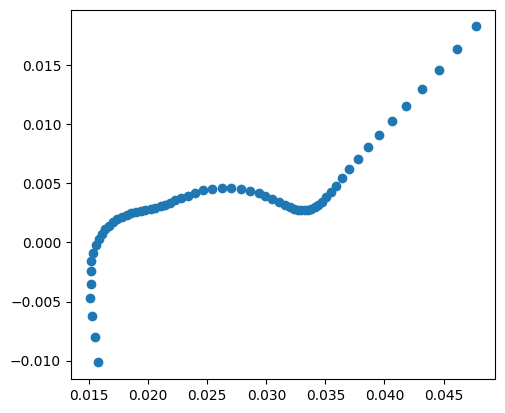

In [69]:
initial_guess=[0.01,0.01,100,0.01,0.05,100,1,100,0.1]
c=CustomCircuit("R0-p(R1,C1)-p(R2-Wo1,C2)-p(L1,R3)",initial_guess=initial_guess)

df=pd.read_csv("../exampleData.csv")
gthbdata=df.to_numpy()
datanew=np.transpose(gthbdata)
freq=datanew[0]

z_data=datanew[1]+1j*datanew[2]
print(len(z_data))

plt.plot(np.real(z_data),-np.imag(z_data),"o",)
plt.gca().set_aspect('equal')
c.fit(frequencies=freq,impedance=z_data)



Circuit string: R0-p(R1,C1)-p(R2-Wo1,C2)-p(L1,R3)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 1.00e-02 [Ohm]
     C1 = 1.00e+02 [F]
     R2 = 1.00e-02 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+02 [sec]
     C2 = 1.00e+00 [F]
     L1 = 1.00e+02 [H]
     R3 = 1.00e-01 [Ohm]

Fit parameters:
     R0 = 1.53e-02  (+/- 2.19e+04) [Ohm]
     R1 = 8.89e-03  (+/- 6.88e-04) [Ohm]
     C1 = 3.36e+00  (+/- 6.58e-01) [F]
     R2 = 5.88e-03  (+/- 6.73e-04) [Ohm]
  Wo1_0 = 1.26e-01  (+/- 5.09e-01) [Ohm]
  Wo1_1 = 9.97e+02  (+/- 8.05e+03) [sec]
     C2 = 2.00e-01  (+/- 4.41e-02) [F]
     L1 = 7.94e+05  (+/- 0.00e+00) [H]
     R3 = 7.33e-04  (+/- 2.19e+04) [Ohm]

[2.19354396e+04 6.87921319e-04 6.58212851e-01 6.72553174e-04
 5.08782824e-01 8.05193183e+03 4.40790424e-02 0.00000000e+00
 2.19354396e+04]


65

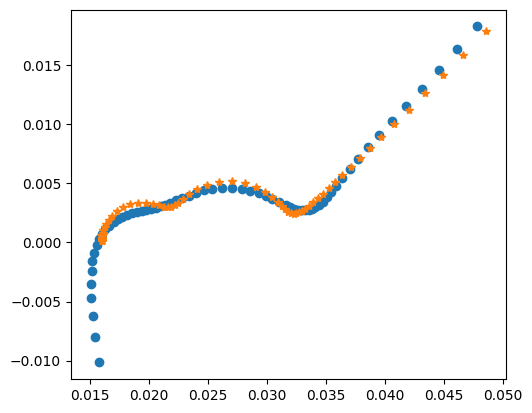

In [68]:
print(c)
z_fit=c.predict(frequencies=freq)
plt.plot(np.real(z_data),-np.imag(z_data),"o")
plt.plot(np.real(z_fit),-np.imag(z_fit),"*")
plt.gca().set_aspect('equal')
print(c.conf_)
len(z_fit)